# Recognition Handwrittern Digits on MNIST Dataset using KNN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Step 1 - Data Preparation

In [2]:
df = pd.read_csv('train.csv')    # Download MNIST Dataset for Hand Digit Recognition
print(df.shape)

(42000, 785)


In [3]:
print(df.columns)

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


In [4]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
data = df.values
print(data.shape)
print(type(data))

(42000, 785)
<class 'numpy.ndarray'>


In [9]:
X = data[:, 1:]
Y = data[:, 0]

print(X.shape, Y.shape)

(42000, 784) (42000,)


In [11]:
split = int(0.8*X.shape[0])
print(split)

X_train = X[:split, :]
Y_train = Y[:split]

X_test = X[split : , :]
Y_test = Y[split: ]

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

33600
(33600, 784) (33600,)
(8400, 784) (8400,)


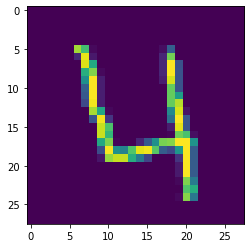

In [13]:
# Visualise Some samples
def drawImg(sample):
    img = sample.reshape((28, 28))
    plt.imshow(img)
    plt.show()

drawImg(X_train[3])

### Step 2 - KNN

In [14]:
def dist(x1, x2):
    return np.sqrt(sum((x1-x2)**2))

In [15]:
def KNN(X, Y, queryPoint, k=5):
    vals = []
    m = X.shape[0]
    for i in range(m):
        d = dist(queryPoint, X[i])
        vals.append((d, Y[i]))
    
    vals = sorted(vals)
    vals = vals[ : k]
    
    vals = np.array(vals)
    new_vals = np.unique(vals[:, 1], return_counts = True)
    # print(new_vals)
    index = new_vals[1].argmax()
    pred = new_vals[0][index]
    return pred

### Step 3 - Make Prediction

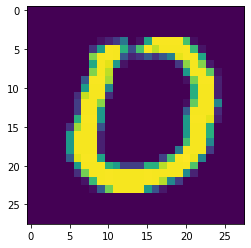

0


In [17]:
pred = KNN(X_train, Y_train, X_test[0])
drawImg(X_test[0])
print(int(pred))

In [ ]:
# Write one method which computes accuracy of KNN the test set!